<small>*BLU513E - Fuzzy Logic Programming*</small><br>
*Valentin L'HOMEL - 922110009*
<h2><center>Homework 1</center></h2>



### Code initialization

In [64]:
import matplotlib.pyplot as plt
import numpy as np

In [74]:
def nmGraphsText(row, column, contents):
    fig, axs = plt.subplots(row, column, figsize=(5*column, 5*row), sharey=True)
    if row == 1: axs = [axs]
    if column == 1: axs = [[ax] for ax in axs]
    axs[0][0].set_ylim((-.05,1.05))
    for i,(X,Y,text) in enumerate(contents):
        r = i % row
        c = i // row
        if isinstance(text, list):
            for ys,t in zip(Y,text):
                axs[r][c].plot(X, ys, label=t)
            axs[r][c].legend()
        else:
            axs[r][c].plot(X, Y)
            axs[r][c].text((len(X)-1 if isinstance(X[0],str) else X[-1]) * 0.5, 1.1, text, {'fontsize': 20}, horizontalalignment='center')

def fuzzyGraphsText(X, graphs_Y_text):
    fig, axs = plt.subplots(len(graphs_Y_text), 1, figsize=(5, 5*len(graphs_Y_text)), sharey=True)
    if len(graphs_Y_text) == 1: axs = [axs]
    axs[0].set_ylim((-.05,1.05))
    for i,(Y,text) in enumerate(graphs_Y_text):
        if isinstance(text, list):
            for j,(ys,(label,t)) in enumerate(zip(Y,text)):
                axs[i].plot(X, ys, label=label)
                axs[i].text((len(X)-1 if isinstance(X[0],str) else X[-1]) * 1.1, .5 + (.25*(len(text)-1)/2) - .25 * j, t, {'fontsize': 20}, horizontalalignment='left')
                axs[i].legend()
        else:
            axs[i].plot(X,Y)
            axs[i].text((len(X)-1 if isinstance(X[0],str) else X[-1]) * 1.1, 0.5, text, {'fontsize': 20}, horizontalalignment='left')

def fuzzySetToString(X,Y):
    return '+'.join([f"\\frac{{{v:.3g}}}{{\\mathsf{{{k}}}}}" for k,v in zip(X,Y)])

### Klir Textbook - Exercice 1.6

The law of contradiction states that the intersection of a set and its complement is null ($A\cap\overline{A} = \empty$). However, on a fuzzy set, the intersection of two sets is defined as the minimum of these two sets. So as long as there is one element whose membership grade is neither 0 nor 1, the intersection at that point will not be null.

The law of excluded middle on the other hand states that the union of a set and its complement is the universe ($A\cup\overline{A} = X$). However, on a fuzzy set, the union of two sets is defined as the maximum of these two sets. So just like for the law of contradiction, a single element whose evaluate as neither 0 nor 1 contradict this rule.

### Klir Textbook - Exercice 1.9

Consider the fuzzy sets defined by the following membership grade functions:
$$ A(x) = \frac{1}{1+10x} $$
$$ B(x) = \left(\frac{1}{1+10x}\right)^{1/2} $$
$$ C(x) = \left(\frac{1}{1+10x}\right)^2 $$

Since $A$ is a subset of $B$ if and only if $A \cup B = B$. Since the union of two sets is the maximum of their values, we only need to check which sets are the highest.

Let's take a value of 5:
* $A(5) = \frac{1}{51} \approx 0.02$
* $B(5) = \frac{1}{51}^{0.5} \approx 0.14$
* $C(5) = \frac{1}{51}^2 \approx 0.0004$

Since we got $C(5) < A(5) < B(5)$, we have $C \subseteq A \subseteq B$.

### Klir Textbook - Exercice 1.10

Considering the fuzzy sets $A$, $B$ and $C$ on $[0,10]$ with the following membership grade functions:

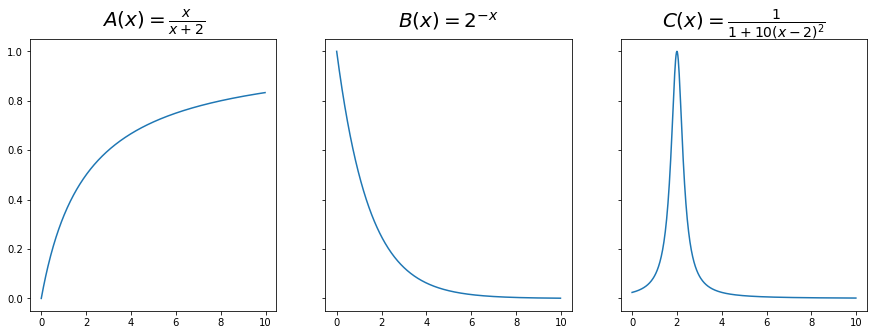

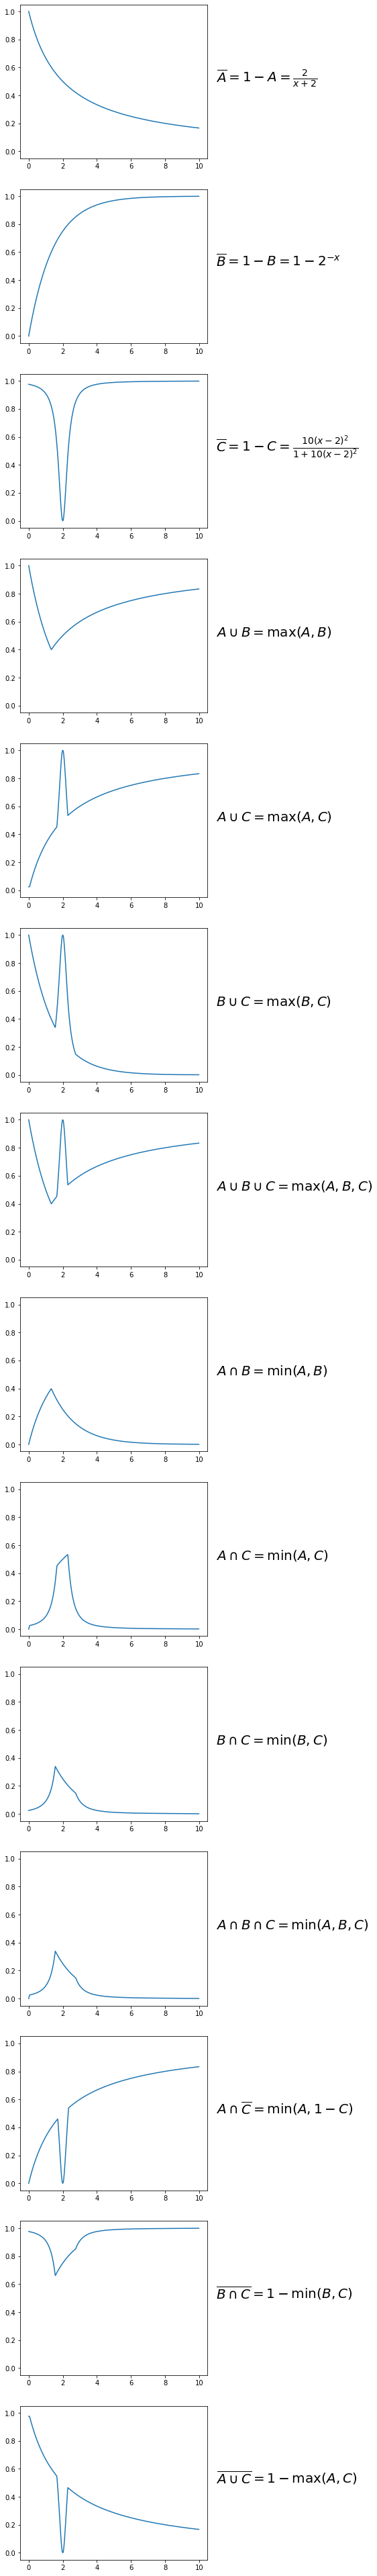

In [66]:
X = np.arange(0,10,0.02)
A = {x: x/(x+2) for x in X}
B = {x: 2**-x for x in X}
C = {x: 1/(1+10*(x-2)**2) for x in X}

nmGraphsText(1, 3, [
    (X, A.values(), r"$A(x) = \frac{x}{x+2}$"),
    (X, B.values(), r"$B(x) = 2^{-x}$"),
    (X, C.values(), r"$C(x) = \frac{1}{1+10(x-2)^2}$"),
])

fuzzyGraphsText(X, [
    ([1 - A[x] for x in X], r"$\overline{A} = 1-A = \frac{2}{x+2}$"),
    ([1 - B[x] for x in X], r"$\overline{B} = 1-B = 1-2^{-x}$"),
    ([1 - C[x] for x in X], r"$\overline{C} = 1-C = \frac{10(x-2)^2}{1+10(x-2)^2}$"),
    ([max(A[x], B[x]) for x in X], r"$A \cup B = \max(A,B)$"),
    ([max(A[x], C[x]) for x in X], r"$A \cup C = \max(A,C)$"),
    ([max(B[x], C[x]) for x in X], r"$B \cup C = \max(B,C)$"),
    ([max(A[x], B[x], C[x]) for x in X], r"$A \cup B \cup C = \max(A,B,C)$"),
    ([min(A[x], B[x]) for x in X], r"$A \cap B = \min(A,B)$"),
    ([min(A[x], C[x]) for x in X], r"$A \cap C = \min(A,C)$"),
    ([min(B[x], C[x]) for x in X], r"$B \cap C = \min(B,C)$"),
    ([min(A[x], B[x], C[x]) for x in X], r"$A \cap B \cap C = \min(A,B,C)$"),
    ([min(A[x], 1 - C[x]) for x in X], r"$A \cap \overline{C} = \min(A,1-C)$"),
    ([1 - min(B[x], C[x]) for x in X], r"$\overline{B \cap C} = 1 - \min(B,C)$"),
    ([1 - max(A[x], C[x]) for x in X], r"$\overline{A \cup C} = 1 - \max(A,C)$"),
])

### Klir Textbook - Exercice 1.11

Considering the 3 fuzzy sets $A$, $B$ and $C$ defined previously, we will calculate their (strong) $\alpha$-cuts for some $\alpha$.

$$ \begin{matrix}
    A & \qquad &
    B & \qquad &
    C \\ \\
%
    \frac{x}{x+2} \ge \alpha       & &
    2^{-x} \ge \alpha     & &
    \frac{1}{1+10(x-2)^2} \ge \alpha \\
%
    x \ge \alpha(x+2)              & &
    -x \ge \log_2{\alpha} & &
    1 \ge \alpha + 10\alpha (x-2)^2 \\
%
    x(1-\alpha) \ge 2\alpha        & &
    x \le -\log_2{\alpha} & &
    0 \ge 10\alpha x^2 - 40\alpha x + 41\alpha - 1 \\
%
    x \ge \frac{2\alpha}{1-\alpha} & & & &
    \frac{40\alpha-\sqrt{(-40\alpha)^2-40\alpha \times (41\alpha-1)}}{20\alpha} \le x \le ... \\ & & & &
%
    2 - \frac{\sqrt{10\alpha(1-\alpha)}}{10\alpha} \le x \le 2 + \frac{\sqrt{10\alpha(1-\alpha)}}{10\alpha}
\end{matrix} $$

The $\alpha$-cuts for $A$ are defined as $^{\alpha}A = [\frac{2\alpha}{1-\alpha},10]$. Here are some examples:<br>
$ \quad^{0.2}A = \{x | x \ge \frac{2 \times 0.2}{1-0.2} \wedge x \in [0,10]\} = [0.5,10] $<br>
$ \quad^{0.5+}A = \{x | x \gt \frac{2 \times 0.5}{1-0.5} \wedge x \in [0,10]\} = (2,10] $<br>
$ \quad^{0.8+}A = \{x | x \gt \frac{2 \times 0.8}{1-0.8} \wedge x \in [0,10]\} = (8,10] $<br>
$ \quad^{1}A = \{x | x \ge \frac{2 \times 1}{1-1} \wedge x \in [0,10]\} = \emptyset $

The $\alpha$-cuts for $B$ are defined as $^{\alpha}B = [0,-\log{\alpha}]$. Here are some examples:<br>
$ \quad^{0.2}B = \{x | x \le -\log_2{0.2} \wedge x \in [0,10]\} = [0,-\log_2{0.2}] \approx [0,2.32] $<br>
$ \quad^{0.5+}B = \{x | x \lt -\log_2{0.5} \wedge x \in [0,10]\} = [0,1) $<br>
$ \quad^{1}B = \{x | x \le -\log_2{1} \wedge x \in [0,10]\} = \{0\} $

The $\alpha$-cuts for $C$ are defined as $^{\alpha}C = \left[2 - \frac{\sqrt{10\alpha(1-\alpha)}}{10\alpha},2 + \frac{\sqrt{10\alpha(1-\alpha)}}{10\alpha}\right]$. Here are some examples:<br>
$ \quad^{0.2}C = \left\{x | 2 - \frac{\sqrt{10 \times 0.2\times(1-0.2)}}{10\times 0.2} \le x \le 2 + \frac{\sqrt{10 \times 0.2\times(1-0.2)}}{10\times 0.2} \wedge x \in [0,10]\right\} = \left[2-\frac{\sqrt{1.6}}{2},2+\frac{\sqrt{1.6}}{2}\right] \approx [1.37,2.63] $<br>
$ \quad^{0.95+}C = \left\{x | 2 - \frac{\sqrt{10 \times 0.95\times(1-0.95)}}{10\times 0.95} \lt x \lt 2 + \frac{\sqrt{10 \times 0.95\times(1-0.95)}}{10\times 0.95} \wedge x \in [0,10]\right\} = \left(2-\frac{\sqrt{0.475}}{9.5},2+\frac{\sqrt{0.475}}{9.5}\right) \approx (1.93,2.07) $<br>
$ \quad^{1}C = \left\{x | 2 - \frac{\sqrt{10 \times 1\times(1-1)}}{10\times 1} \le x \le 2 + \frac{\sqrt{10 \times 1\times(1-1)}}{10\times 1} \wedge x \in [0,10]\right\} = \{2\} $



### Klir Textbook - Exercice 1.12

For a fuzzy set to be convex, every possibles $\alpha$-cuts on this fuzzy set must be either continous or null. Which means we can't have an $\alpha$-cut like $[0,1)\cup(2,3]$.

Of all the fuzzy sets [defined previously](#klir-textbook---exercice-110), this does apply exclusively for the following cases:
* $A$
* $B$
* $C$
* $\overline{A}$
* $\overline{B}$
* $A\cap B$
* $A\cap C$
* $B\cap C$
* $A\cap B\cap C$

### Klir Textbook - Exercice 2.1

The $\alpha$-cut ($^\alpha A$) in fuzzy set theory is the interval on the inputs for which the associated membership is greater than or equal to $\alpha$ ($A(x) \ge \alpha$).

On a strong $\alpha$-cut ($^{\alpha+}A$), the associated membership must be strictly greater than $\alpha$ ($A(x) \gt \alpha$).

They are an easy way to decompose a fuzzy sets, and also allow us to reconstruct it using several different $\alpha$-cuts. They also allow quick comparison and operation on fuzzy sets, since their behaviour are a reproduction of the associated fuzzy set's behaviour.

### Klir Textbook - Exercice 2.4

Considering the fuzzy set $A$ defined by
$$A = .5/x_1 + .4/x_2 + .7/x_3 + .8/x_4 + 1/x_5$$
its $\alpha$-cuts and strong $\alpha$-cuts are the following:

$$ ^\alpha A = \begin{cases}
    \{x_1,x_2,x_3,x_4,x_5\} & \alpha \in [0,0.4] \\
    \{x_1,x_3,x_4,x_5\}     & \alpha \in (0.4,0.5] \\
    \{x_3,x_4,x_5\}         & \alpha \in (0.5,0.7] \\
    \{x_4,x_5\}             & \alpha \in (0.7,0.8] \\
    \{x_5\}                 & \alpha \in (0.8,1]
\end{cases}$$

$$ ^{\alpha+}A = \begin{cases}
    \{x_1,x_2,x_3,x_4,x_5\} & \alpha \in [0,0.4) \\
    \{x_1,x_3,x_4,x_5\}     & \alpha \in [0.4,0.5) \\
    \{x_3,x_4,x_5\}         & \alpha \in [0.5,0.7) \\
    \{x_4,x_5\}             & \alpha \in [0.7,0.8) \\
    \{x_5\}                 & \alpha \in [0.8,1) \\
    \emptyset               & \alpha = 1
\end{cases}$$

### Ross Textbook - Exercice 2.7

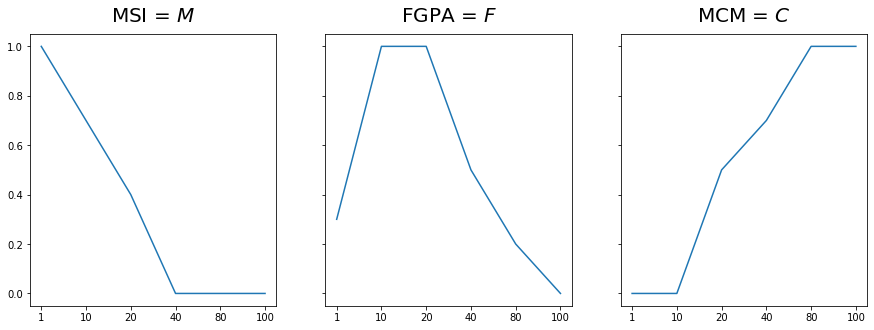

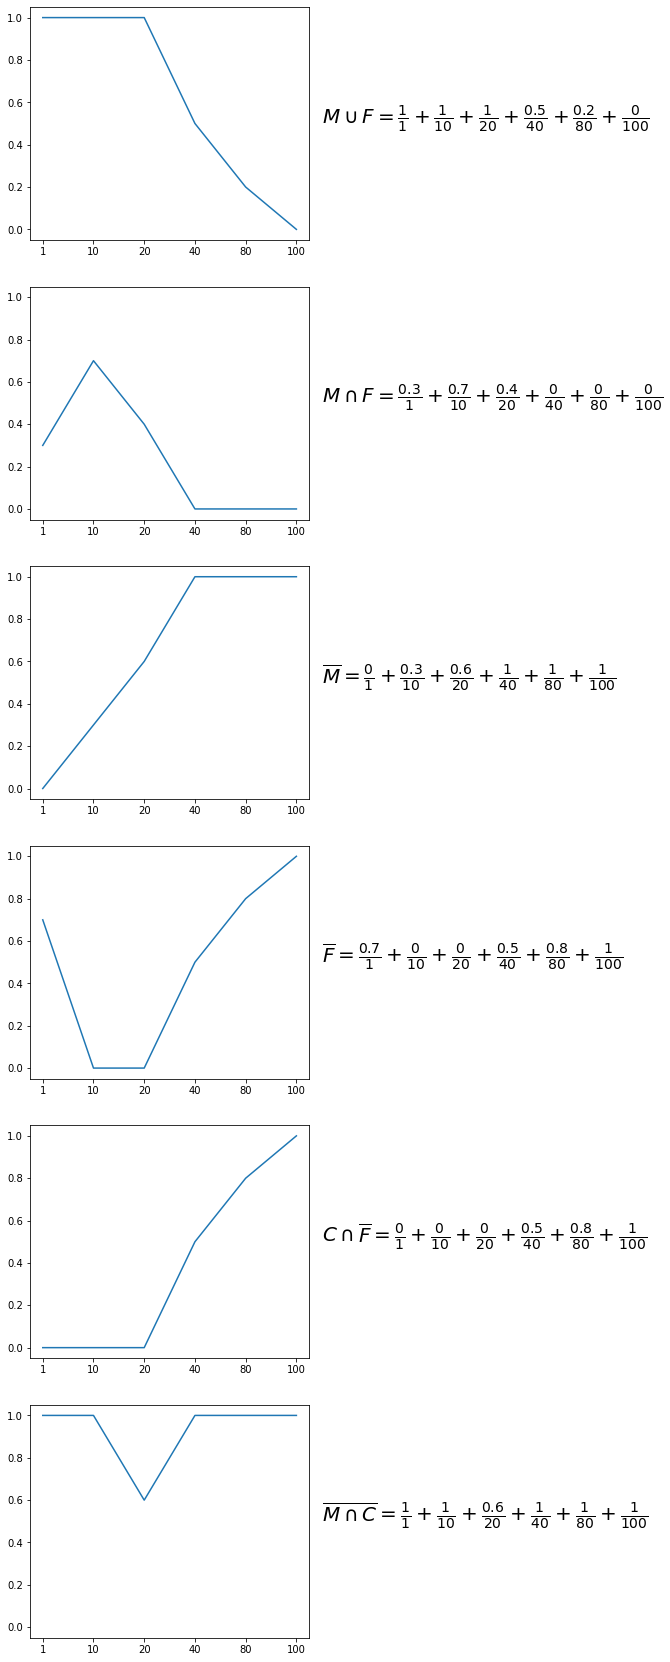

In [67]:
X = [1,10,20,40,80,100]
Xs = list(map(str,X))
M = {1:1, 10:.7, 20:.4, 40:0, 80:0, 100:0}
F = {1:.3, 10:1, 20:1, 40:.5, 80:.2, 100:0}
C = {1:0, 10:0, 20:0.5, 40:.7, 80:1, 100:1}

nmGraphsText(1, 3, [
    (Xs, M.values(), r"MSI = $M$"),
    (Xs, F.values(), r"FGPA = $F$"),
    (Xs, C.values(), r"MCM = $C$"),
])

sets = (
    [max(M[x], F[x]) for x in X],
    [min(M[x], F[x]) for x in X],
    [1 - M[x] for x in X],
    [1 - F[x] for x in X],
    [min(C[x], 1 - F[x]) for x in X],
    [1 - min(M[x], C[x]) for x in X]
)
fuzzyGraphsText(Xs, [
    (sets[0], r"$M \cup F = " + fuzzySetToString(X, sets[0]) + '$'),
    (sets[1], r"$M \cap F = " + fuzzySetToString(X, sets[1]) + '$'),
    (sets[2], r"$\overline{M} = " + fuzzySetToString(X, sets[2]) +'$'),
    (sets[3], r"$\overline{F} = " + fuzzySetToString(X, sets[3]) +'$'),
    (sets[4], r"$C\cap\overline{F} = " + fuzzySetToString(X, sets[4]) +'$'),
    (sets[5], r"$\overline{M\cap C} = " + fuzzySetToString(X, sets[5]) +'$'),
])

### Ross Textbook - Exercice 2.10

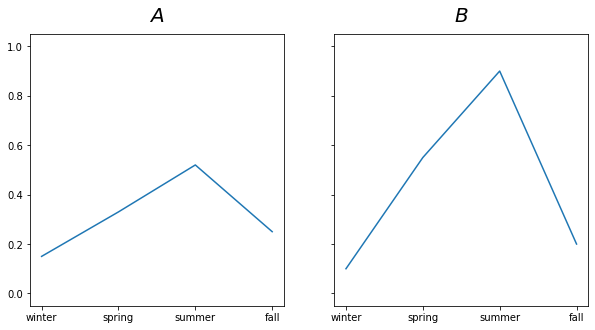

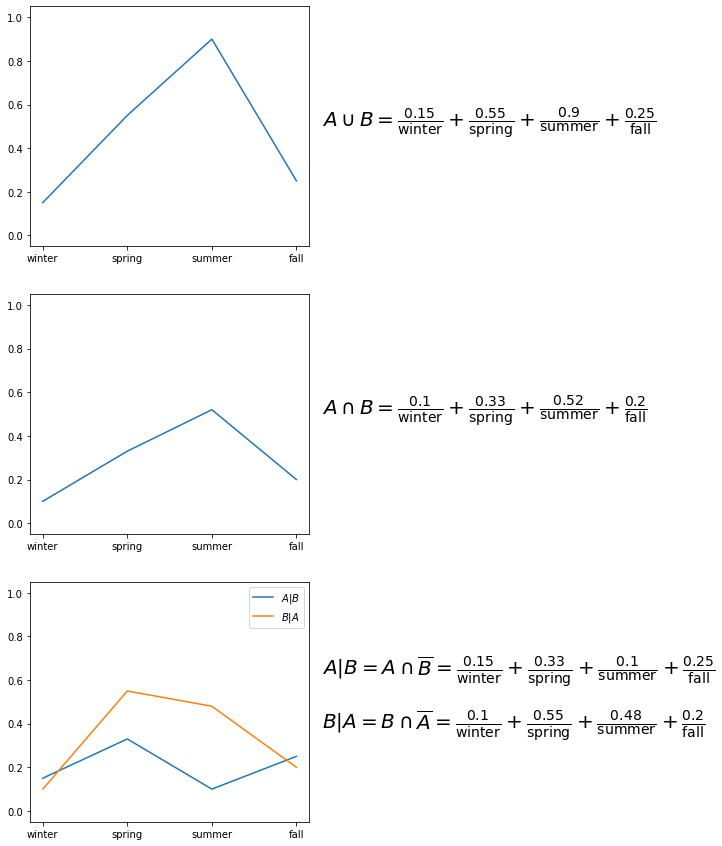

In [68]:
X = ['winter','spring','summer','fall']
A = {'winter':0.15, 'spring':.33, 'summer':.52, 'fall':0.25}
B = {'winter':0.1, 'spring':.55, 'summer':.9, 'fall':0.2}

nmGraphsText(1, 2, [
    (X, [A[x] for x in X], r'$A$'),
    (X, [B[x] for x in X], r'$B$'),
])

sets = (
    [max(A[x],B[x]) for x in X],
    [min(A[x],B[x]) for x in X],
    [min(A[x],1-B[x]) for x in X],
    [min(B[x],1-A[x]) for x in X],
)
fuzzyGraphsText(X, [
    (sets[0], r"$A \cup B = " + fuzzySetToString(X, sets[0]) + '$'),
    (sets[1], r"$A \cap B = " + fuzzySetToString(X, sets[1]) + '$'),
    ([sets[2], sets[3]], [
        (r"$A|B$", r"$A|B = A \cap \overline{B} = " + fuzzySetToString(X, sets[2]) + '$'),
        (r"$B|A$", r"$B|A = B \cap \overline{A} = " + fuzzySetToString(X, sets[3]) + '$'),
    ]),
])

### Ross Textbook - Exercice 2.12

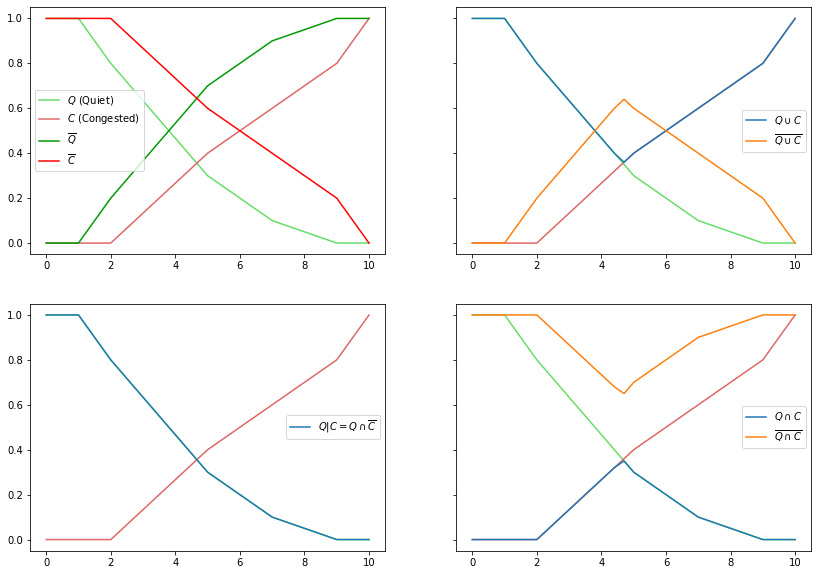

In [79]:
X = [0,1,2,5,7,9,10]
_Q = [1,1,.8,.3,.1,0,0]
_C = [0,0,0,.4,.6,.8,1]

# Extend X to cover interval values
X = [x * (1-j/10) + X[i+1] * j/10 for i,x in enumerate(X[:-1]) for j in range(10)] + [X[-1]]
# Interpolate Q and C for interval values
Q = {X[i*10+j]: q * (1-j/10) + _Q[i+1] * j/10 for i,q in enumerate(_Q[:-1]) for j in range(10)}
Q[X[-1]] = _Q[-1]
C = {X[i*10+j]: c * (1-j/10) + _C[i+1] * j/10 for i,c in enumerate(_C[:-1]) for j in range(10)}
C[X[-1]] = _C[-1]

fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(14,10),sharey=True)

ax0.plot(X,[Q[x] for x in X],'#66DD66',label='$Q$ (Quiet)')
ax0.plot(X,[C[x] for x in X],'#DD6666',label='$C$ (Congested)')
ax0.plot(X,[1 - Q[x] for x in X],'#009900',label='$\overline{Q}$')
ax0.plot(X,[1 - C[x] for x in X],'#FF0000',label='$\overline{C}$')
ax0.legend()

for ax in [ax1,ax2,ax3]:
    ax.plot(X,[Q[x] for x in X],'#66DD66')
    ax.plot(X,[C[x] for x in X],'#DD6666')

ax1.plot(X,[max(Q[x], C[x]) for x in X],label='$Q \cup C$')
ax1.plot(X,[1 - max(Q[x], C[x]) for x in X],label='$\overline{Q \cup C}$')
ax1.legend()

ax2.plot(X,[min(Q[x], 1 - C[x]) for x in X],label='$Q|C = Q \cap \overline{C}$')
ax2.legend()

ax3.plot(X,[min(Q[x], C[x]) for x in X],label='$Q \cap C$')
ax3.plot(X,[1 - min(Q[x], C[x]) for x in X],label='$\overline{Q \cap C}$')
ax3.legend()
plt.draw()